# Scipy.integrate
There's a lot of different integration methods that we wont get around to covering.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

In [32]:
def dNdt(t, N):
    """
    Differential equation for radioactive decay dN/dt = -lamda*N
    
    Inputs
    ----------
    N:  Number of atoms
    t:  time
    
    Output
    ----------
    dN/dt:  Right hand side of the differential we want to solve
    """
    lam = 3.9e-12 #Decay constant for Carbon 14 half life of about 5700 years (s**-1)
    return -lam*N

In [33]:
num_of_atoms = 6.022e23 #Number of atoms I want to start with (1 mole)
year = 3.154e7 #Number of seconds in a year
t_final = 50000*year #How long I want to wait for this to decay. (0,000 Years) (s)

f = scipy.integrate.solve_ivp(dNdt, (0, t_final), [num_of_atoms])

In [38]:
f = scipy.integrate.solve_ivp(dNdt, (0, t_final), [num_of_atoms], method='LSODA')
g = scipy.integrate.solve_ivp(dNdt, (0, t_final), [num_of_atoms], method='RK45')

In [36]:
%timeit scipy.integrate.solve_ivp(dNdt, (0, t_final), [num_of_atoms], method='LSODA')
%timeit scipy.integrate.solve_ivp(dNdt, (0, t_final), [num_of_atoms], method='RK45')

454 µs ± 3.92 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.48 ms ± 5.35 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


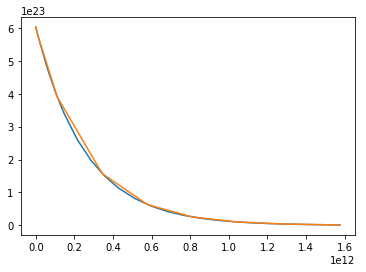

In [41]:
plt.plot(f.t, f.y[0])
plt.plot(g.t, g.y[0])

In [40]:
len(f.t),len(g.t)

(24, 24)

In [ ]:
g = scipy.integrate.